## Assignment 3 - Question 2:
DNN model on Black Friday Dataset

Submitted by - Parag Shah

## Import the packages and Read in the data

In [107]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import *
import math

%matplotlib inline

In [22]:
%pwd

'/Users/paragshah/Desktop/Semester 1/INFO 6105 DS/Assignments/Assignment_3_Parag/Question 2'

In [23]:
!ls

Assignment 3 - Question 2.ipynb train.csv
test.csv


In [24]:
path = %pwd
print(path)

/Users/paragshah/Desktop/Semester 1/INFO 6105 DS/Assignments/Assignment_3_Parag/Question 2


In [25]:
my_df = pd.read_csv(f'{path}/train.csv')
print(my_df.shape)
my_df.head(2)

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [26]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### Pre-process the data

In [27]:
#Separate out X and Y

X = my_df.iloc[:, :11]
Y = my_df.iloc[:, 11:12]

In [28]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN


In [29]:
Y

,Purchase
0,8370
1,15200
2,1422
3,1057
4,7969
...,...
550063,368
550064,371
550065,137
550066,365


In [30]:
print(X.shape, Y.shape)

(550068, 11) (550068, 1)


### Deal with missing values

In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)
imputer = imputer.fit(X.iloc[:, 9:11].values)
X.iloc[:,9:11] = imputer.transform(X.iloc[:, 9:11].values)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 46.2+ MB


### Drop columns - User_ID and Product_ID

In [45]:
X.drop(['User_ID','Product_ID'], axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 37.8+ MB


In [46]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,0,3,9.842329,12.668243
1,F,0-17,10,A,2,0,1,6.000000,14.000000
2,F,0-17,10,A,2,0,12,9.842329,12.668243
3,F,0-17,10,A,2,0,12,14.000000,12.668243
4,M,55+,16,C,4+,0,8,9.842329,12.668243


### Clean the values for Age and Stay_In_Current_City_Years

In [47]:
X['Age']=(X['Age'].str.strip('+'))

In [48]:
X['Stay_In_Current_City_Years'] = (X['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [49]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2.0,0,3,9.842329,12.668243
1,F,0-17,10,A,2.0,0,1,6.000000,14.000000
2,F,0-17,10,A,2.0,0,12,9.842329,12.668243
3,F,0-17,10,A,2.0,0,12,14.000000,12.668243
4,M,55,16,C,4.0,0,8,9.842329,12.668243


### Convert String to numbers

In [50]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [51]:
X['Gender'] = labelencoder.fit_transform(X['Gender'])
X['Age'] = labelencoder.fit_transform(X['Age'])
X['City_Category'] = labelencoder.fit_transform(X['City_Category'])
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2.0,0,3,9.842329,12.668243
1,0,0,10,0,2.0,0,1,6.000000,14.000000
2,0,0,10,0,2.0,0,12,9.842329,12.668243
3,0,0,10,0,2.0,0,12,14.000000,12.668243
4,1,6,16,2,4.0,0,8,9.842329,12.668243


### Scaling the data

In [56]:
scaler = preprocessing.StandardScaler().fit(X)
X_scale = pd.DataFrame(scaler.transform(X))
X_scale.head()

,0,1,2,3,4,5,6,7,8
0,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-0.610809,4.221533e-16,-7.819065e-16
1,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,-1.118912,-9.131340e-01,5.862050e-01
2,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,4.221533e-16,-7.819065e-16
3,-1.746513,-1.844248,0.294864,-1.371516,0.109801,-0.833018,1.675656,9.880753e-01,-7.819065e-16
4,0.572570,2.588277,1.214734,1.259336,1.660861,-0.833018,0.659449,4.221533e-16,-7.819065e-16


### Train - Valid - Test Split

In [59]:
# Train - Valid Split
(X_train, X_valid_test, Y_train, Y_valid_test) = train_test_split(X_scale, Y, test_size=0.3, random_state=1)
print(X_train.shape, X_valid_test.shape, Y_train.shape, Y_valid_test.shape)

(385047, 9) (165021, 9) (385047, 1) (165021, 1)


In [60]:
#Valid - Test split (divide valid dataset into 2 halves)
(X_valid, X_test, Y_valid, Y_test) = train_test_split(X_valid_test, Y_valid_test, test_size=0.5, random_state=1)
print(X_valid.shape, X_test.shape, Y_valid.shape, Y_test.shape)

(82510, 9) (82511, 9) (82510, 1) (82511, 1)


### Build and compile a deep learning model

In [71]:
model = Sequential()
model.add(Dense(10, input_dim=9, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [74]:
history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=5, batch_size=10)

Train on 385047 samples, validate on 82510 samples
Epoch 1/5
385047/385047 [==============================] - 32s 83us/step - loss: 20450374.7276 - mse: 20450386.0000 - mae: 3428.4116 - val_loss: 19445981.5642 - val_mse: 19445964.0000 - val_mae: 3319.2219
Epoch 2/5
385047/385047 [==============================] - 32s 82us/step - loss: 18511163.4811 - mse: 18511204.0000 - mae: 3194.6140 - val_loss: 17903839.5358 - val_mse: 17903836.0000 - val_mae: 3116.6843
Epoch 3/5
385047/385047 [==============================] - 32s 82us/step - loss: 17869545.6937 - mse: 17869540.0000 - mae: 3112.3296 - val_loss: 17689025.0909 - val_mse: 17689030.0000 - val_mae: 3097.5964
Epoch 4/5
385047/385047 [==============================] - 31s 82us/step - loss: 17747884.1438 - mse: 17747848.0000 - mae: 3095.9763 - val_loss: 17614639.7288 - val_mse: 17614628.0000 - val_mae: 3074.1213 - mse: 17765036.0
Epoch 5/5
385047/385047 [==============================] - 32s 82us/step - loss: 17664589.0025 - mse: 17664586.

In [76]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

82511/82511 [==============================] - 1s 9us/step
Accuracy: 1763148000.00%


### Hyperparameter tuning

In [82]:
def model_fn():
    model1 = Sequential()
    model1.add(Dense(10, input_dim=9, kernel_initializer='uniform', activation='relu'))
    model1.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model1.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse', 'mae'])
    return model1

In [83]:
model2 = KerasRegressor(build_fn=model_fn, epochs=5, batch_size=10)

In [84]:
model2.fit(X_valid, Y_valid)

Epoch 1/5
82510/82510 [==============================] - 7s 86us/step - loss: -279683713.0049 - mse: 110850880.0000 - mae: 9252.9854: 1s - loss: -187755297.8191 - mse: 111048736.
Epoch 2/5
82510/82510 [==============================] - 7s 84us/step - loss: -2809487414.3042 - mse: 110850496.0000 - mae: 9252.9912 5s - loss: -1149977030.2238 - mse: 110167880.0000 - mae: 9241.94 - ETA: 5s - loss: -115877 - ETA: 4s - loss: -1404 - ETA: 1s - loss: -2238567620.7509 -  - ETA: 0s - loss: -2556471952.0000 - mse: 110768320.0000 - mae: 9248. - ETA: 0s - loss: -2590561110.5827 - mse: 1108406
Epoch 3/5
82510/82510 [==============================] - 7s 84us/step - loss: -9844308657.9527 - mse: 110850416.0000 - mae: 9253.0098 0s - loss: -9521477305.9173 - mse: 110884808.0000 
Epoch 4/5
82510/82510 [==============================] - 7s 83us/step - loss: -23367431409.8519 - mse: 110850480.0000 - mae: 9252.9941: 0s - loss: -22572739060.6879 - mse: 111071320.0000 - ma
Epoch 5/5
82510/82510 [==============

In [87]:
#Apply GridSearchCV
model2 = KerasRegressor(build_fn=model_fn)
batch_sizes = [10, 20]
epochs_list = [2, 5]
parameters = dict(batch_size=batch_sizes, epochs=epochs_list)

In [88]:
grid = GridSearchCV(estimator=model2, param_grid=parameters)
grid.fit(X_valid, Y_valid)

Epoch 1/2
66008/66008 [==============================] - 6s 94us/step - loss: -129089666.2670 - mse: 110986560.0000 - mae: 9258.2061
Epoch 2/2
16502/16502 [==============================] - 1s 44us/step
Epoch 1/2
66008/66008 [==============================] - 6s 97us/step - loss: -193640776.3060 - mse: 110899624.0000 - mae: 9256.5547
Epoch 2/2
16502/16502 [==============================] - 1s 44us/step
Epoch 1/2
66008/66008 [==============================] - 6s 96us/step - loss: -121615462.9091 - mse: 111113480.0000 - mae: 9265.58011s - loss: -6553642
Epoch 2/2
16502/16502 [==============================] - 1s 46us/step
Epoch 1/2
66008/66008 [==============================] - 7s 100us/step - loss: -127432638.9306 - mse: 110487360.0000 - mae: 9235.5127
Epoch 2/2
16502/16502 [==============================] - 1s 50us/step
Epoch 1/2
66008/66008 [==============================] - 8s 119us/step - loss: -96585445.0962 - mse: 110767120.0000 - mae: 9249.23630s - loss: -79996396.6257 - mse: 1
E

GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x1a4bfcb0d0>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [10, 20], 'epochs': [2, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [89]:
print(grid.best_score_, grid.best_params_)

25287357992.431694 {'batch_size': 10, 'epochs': 5}


In [90]:
parameters = grid.cv_results_['params']
print(parameters)

[{'batch_size': 10, 'epochs': 2}, {'batch_size': 10, 'epochs': 5}, {'batch_size': 20, 'epochs': 2}, {'batch_size': 20, 'epochs': 5}]


In [91]:
# Apply best parameters found above
model2 = KerasRegressor(build_fn=model_fn, batch_size=10, epochs=5)

In [92]:
model2.fit(X_valid, Y_valid)

Epoch 1/5
82510/82510 [==============================] - 12s 140us/step - loss: -336663838.1148 - mse: 110850728.0000 - mae: 9253.01761s - loss: -219972072.1349 - m
Epoch 2/5
82510/82510 [==============================] - 11s 130us/step - loss: -3397202526.2625 - mse: 110850408.0000 - mae: 9252.9990s - loss: -27 - ETA: 1s - loss: -3075544448.4478 - mse: 110903520.0000 - mae: 9254. - ETA: 1s - loss: -3106639343.1
Epoch 3/5
82510/82510 [==============================] - 11s 132us/step - loss: -11935104015.2961 - mse: 110850496.0000 - mae: 9253.0049
Epoch 4/5
82510/82510 [==============================] - 11s 128us/step - loss: -28349676387.2229 - mse: 110850776.0000 - mae: 9252.98052s - loss: 
Epoch 5/5
82510/82510 [==============================] - 11s 135us/step - loss: -55148179529.2226 - mse: 110850416.0000 - mae: 9252.974611s - loss: -3948296 - ETA: 9s - loss: -41441762161.2158 - mse: 110765 - ETA: 4s - loss: -48302670115.8108 - mse: 1106 - ETA: 3s - loss: -5057337256 - ETA: 0s - lo

### Evaluate model performance on test dataset

In [115]:
# evaluate performance on test data set
scores = model2.score(X_test, Y_test)
print(scores)

82511/82511 [==============================] - 7s 80us/step
72408564621.52081


In [112]:
Y_test_pred = model2.predict(X_test)

# Mean squared error
mse = mean_squared_error(Y_test, Y_test_pred)
print('MSE:', mse)

# Root mean squared error
rmse = math.sqrt(mse)
print('RMSE:',rmse)

MSE: 111151021.73112676
RMSE: 10542.8184908556


### Epoch versus Train set accuracy and Valid set accuracy

In [110]:
history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=5, batch_size=10)

Train on 385047 samples, validate on 82510 samples
Epoch 1/5
   790/385047 [..............................] - ETA: 1:29 - loss: 16131059.2864 - mse: 16131058.0000 - mae: 2922.5930

/Users/paragshah/opt/anaconda3/envs/new_base/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


385047/385047 [==============================] - 54s 141us/step - loss: 16695771.8841 - mse: 16695628.0000 - mae: 3013.3232 - val_loss: 16449694.5100 - val_mse: 16449671.0000 - val_mae: 2998.7205
Epoch 2/5
385047/385047 [==============================] - 54s 141us/step - loss: 16497996.7048 - mse: 16498052.0000 - mae: 3007.8652 - val_loss: 16302405.7233 - val_mse: 16302388.0000 - val_mae: 2989.3860
Epoch 3/5
385047/385047 [==============================] - 58s 151us/step - loss: 16392195.7365 - mse: 16392171.0000 - mae: 2998.2229 - val_loss: 16213195.3445 - val_mse: 16213201.0000 - val_mae: 2980.7212
Epoch 4/5
385047/385047 [==============================] - 57s 147us/step - loss: 16314823.5752 - mse: 16314850.0000 - mae: 2989.7959 - val_loss: 16151141.5526 - val_mse: 16151117.0000 - val_mae: 2970.9458
Epoch 5/5
385047/385047 [==============================] - 58s 150us/step - loss: 16260647.2051 - mse: 16260588.0000 - mae: 2984.6372 - val_loss: 16098099.2681 - val_mse: 16098131.0000 -

dict_keys(['val_loss', 'val_mse', 'val_mae', 'loss', 'mse', 'mae'])


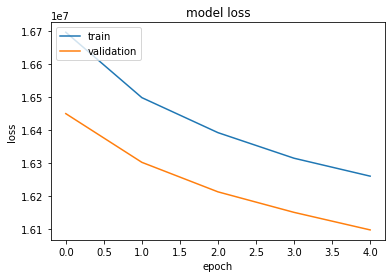

In [111]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### End of file